# 获取数据

In [4]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import numpy as np
import os

In [5]:
df = pdr.get_data_tiingo('601398', start='2020-01-01', end='2021-08-11', api_key=os.getenv('TIINGO_API_KEY'))

# 去掉没用的multiindex

In [6]:
df.reset_index(level=0, inplace=True)
df.index = df.index.date
df


,symbol,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
2020-01-01,601398,5.88,5.88,5.88,5.88,0,5.299197,5.299197,5.299197,5.299197,0,0.0,1.0
2020-01-02,601398,5.97,6.03,5.91,5.92,234949400,5.380307,5.434381,5.326234,5.335246,234949400,0.0,1.0
2020-01-03,601398,5.99,6.02,5.96,5.97,152213050,5.398332,5.425369,5.371295,5.380307,152213050,0.0,1.0
2020-01-06,601398,5.97,6.05,5.95,5.96,226509710,5.380307,5.452405,5.362283,5.371295,226509710,0.0,1.0
2020-01-07,601398,6.01,6.04,5.98,5.98,116804350,5.416356,5.443393,5.389320,5.389320,116804350,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-05,601398,4.54,4.57,4.53,4.55,109747160,4.540000,4.570000,4.530000,4.550000,109747160,0.0,1.0
2021-08-06,601398,4.53,4.55,4.51,4.55,158732840,4.530000,4.550000,4.510000,4.550000,158732840,0.0,1.0
2021-08-09,601398,4.55,4.57,4.51,4.52,192560060,4.550000,4.570000,4.510000,4.520000,192560060,0.0,1.0
2021-08-10,601398,4.56,4.57,4.52,4.55,177389100,4.560000,4.570000,4.520000,4.550000,177389100,0.0,1.0


# 计算MA和EMA， 比较EMA和MA的差别

In [7]:
ema_long = 26
ema_short = 12

In [8]:
df['ema_long'] = df['adjClose'].ewm(span=ema_long, adjust=False).mean()
df['ema_short'] = df['adjClose'].ewm(span=ema_short, adjust=False).mean()
df['ma_long'] = df['adjClose'].rolling(window=ema_long).mean()
df['ma_short'] = df['adjClose'].rolling(window=ema_short).mean()


In [9]:
df[['ma_short','ema_short']].iloc[12:24]

,ma_short,ema_short
2020-01-17,5.335246,5.307076
2020-01-20,5.325483,5.300318
2020-01-21,5.308960,5.284894
2020-01-22,5.295442,5.274616
2020-01-23,5.273662,5.256214
2020-01-24,5.259393,5.240643
2020-01-27,5.245124,5.227467
2020-01-28,5.230854,5.216318
2020-01-29,5.215083,5.206885
2020-01-30,5.198560,5.198903


In [10]:
df1 = df[['adjClose','ema_short', 'ma_short']]
df1 = df1.head(200)

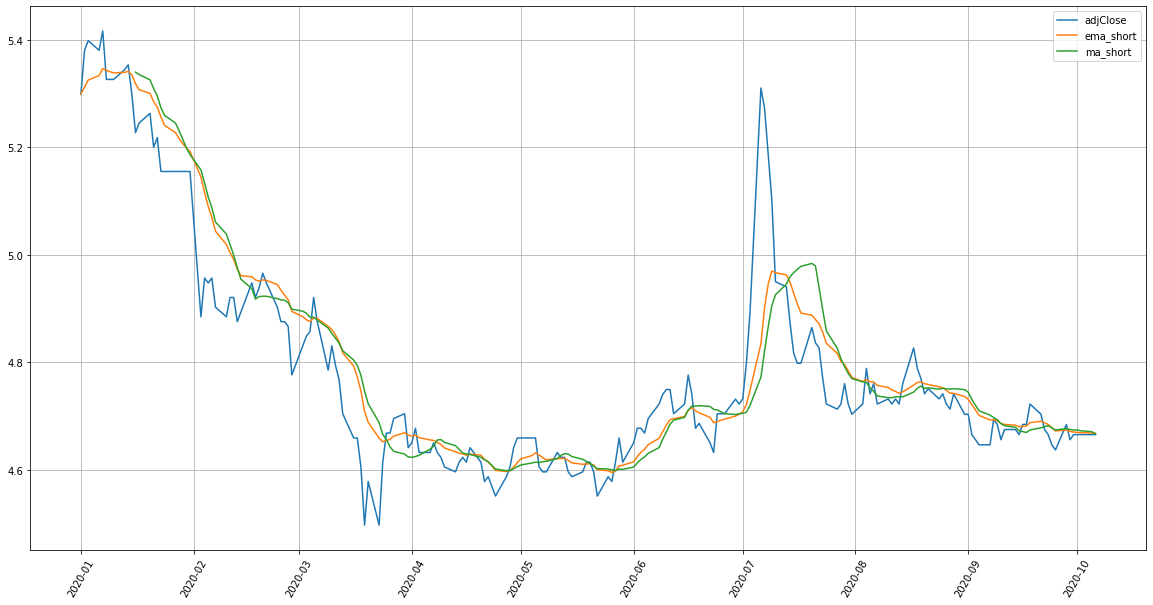

In [11]:
df1.plot(figsize=(20,10), rot=60, grid=True);

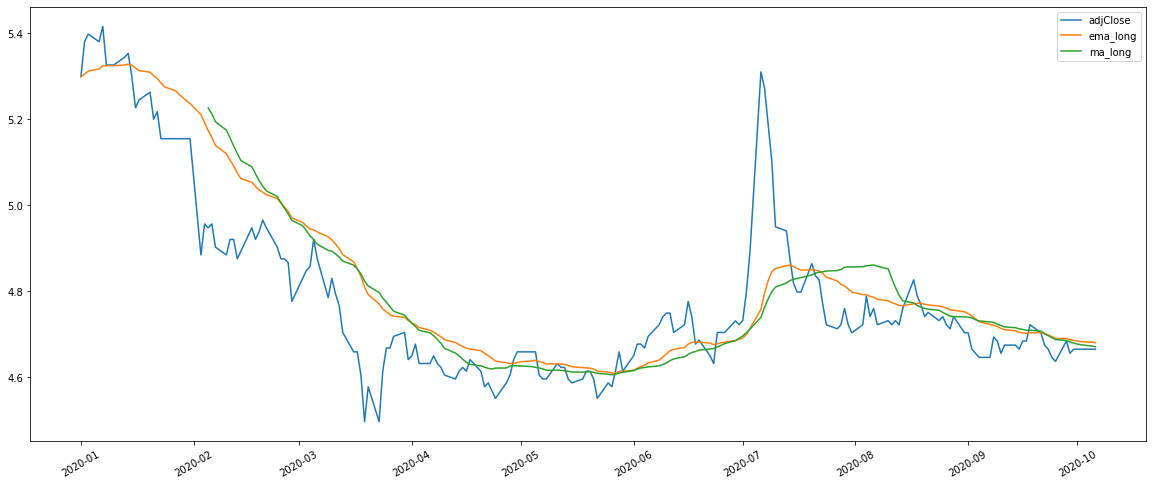

In [12]:
df2 = df[['adjClose','ema_long', 'ma_long']]
df2 = df2.iloc[0:200]
df2.plot(figsize=(20,8), rot=30);


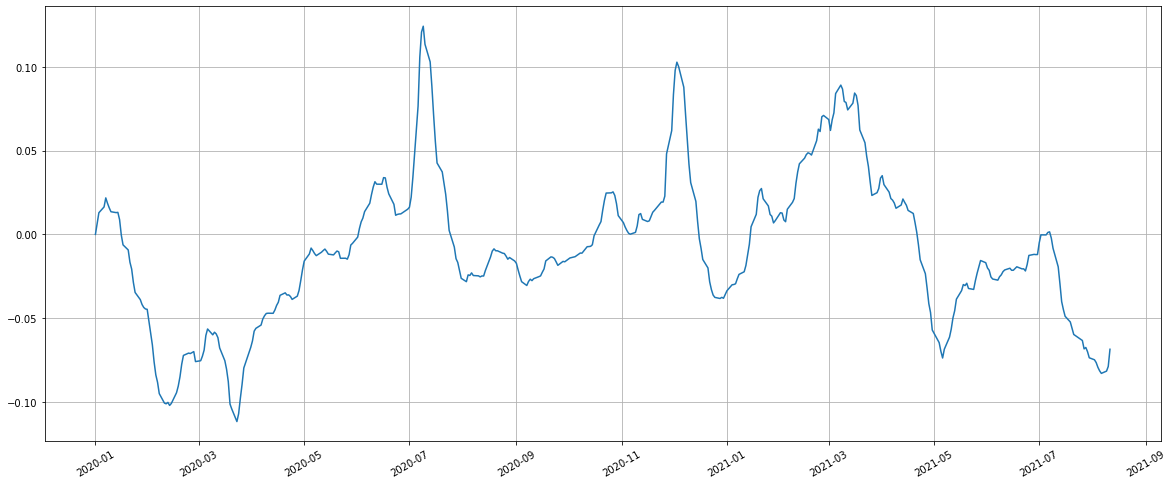

In [13]:
df['macd'] = df['ema_short'] - df['ema_long']
df['macd'].plot(figsize=(20,8), rot=30, grid=True);


# 画出一个0线

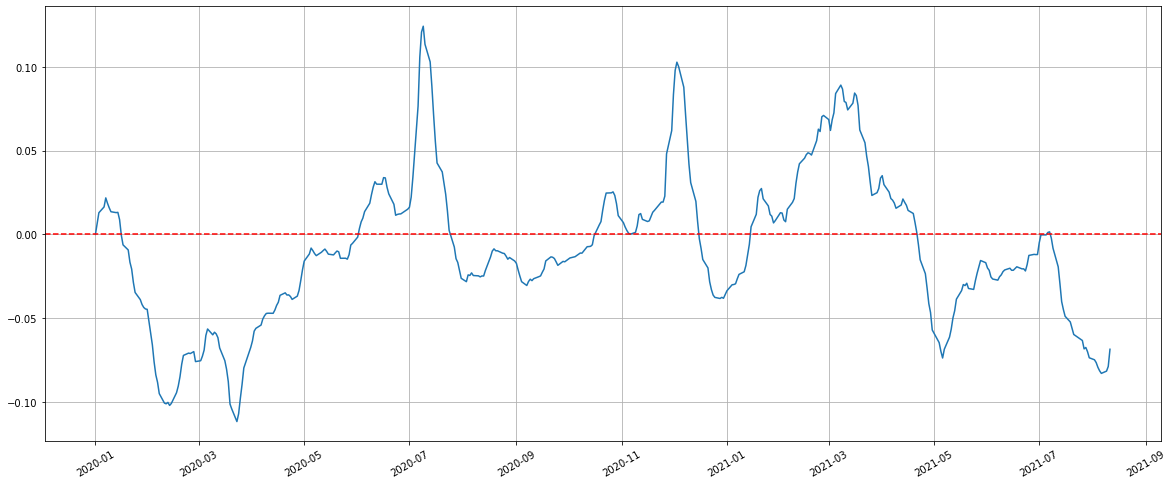

In [14]:
df['macd'].plot(figsize=(20,8), rot=30, grid=True);
plt.axhline(y=0, color='red', linestyle='--');


# 信号线, 对macd取 ema(9)

In [15]:
ema_signal = 9

df['macd_signal'] = df['macd'].ewm(span=ema_signal).mean()
df['macd_bar'] = df['macd'] - df['macd_signal']

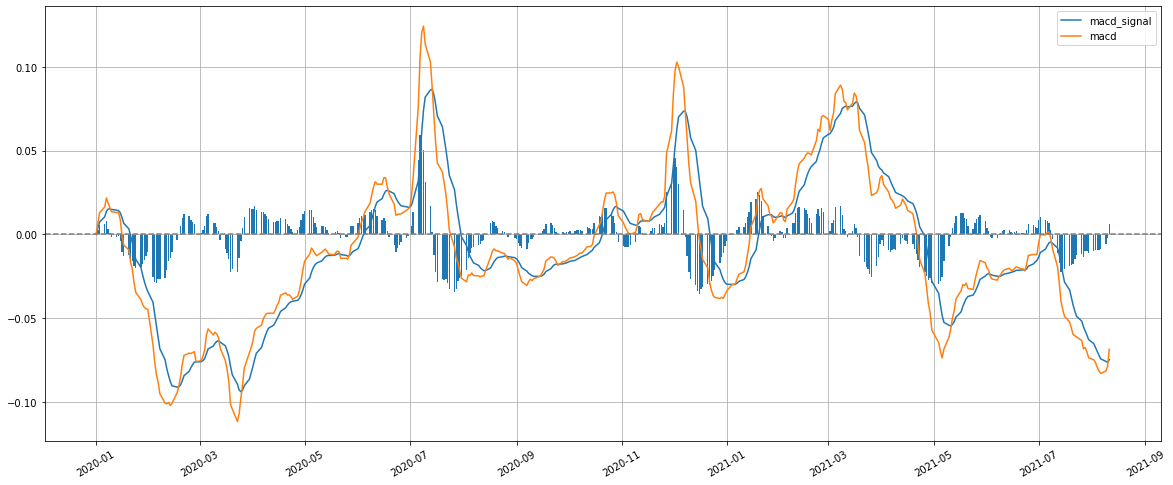

In [16]:

df['macd_signal'].plot(figsize=(20,8), rot=30, grid=True);
df['macd'].plot(figsize=(20,8), rot=30, grid=True);
#df['macd_bar'].plot(linestyle='--', color='red')
plt.bar(df.index, df['macd_bar'])

plt.axhline(y=0, linestyle='--', color='gray');
plt.legend();

# 看短一点的时间

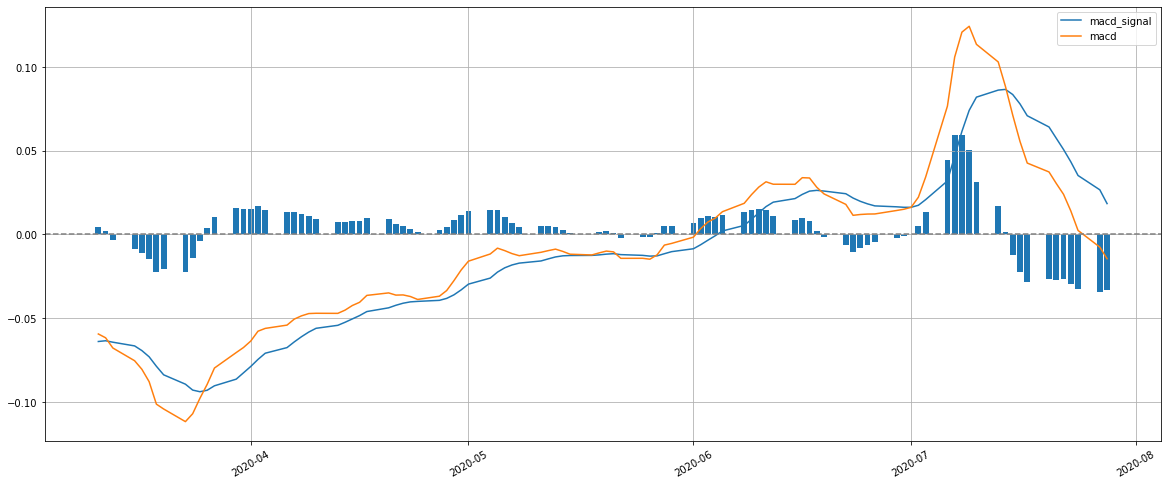

In [17]:
df2 = df.iloc[50:150]
df2['macd_signal'].plot(figsize=(20,8), rot=30, grid=True);
df2['macd'].plot(figsize=(20,8), rot=30, grid=True);
#df['macd_bar'].plot(linestyle='--', color='red')
plt.bar(df2.index, df2['macd_bar'])

plt.axhline(y=0, linestyle='--', color='gray');
plt.legend();

# 把价格和macd画到一张图上看

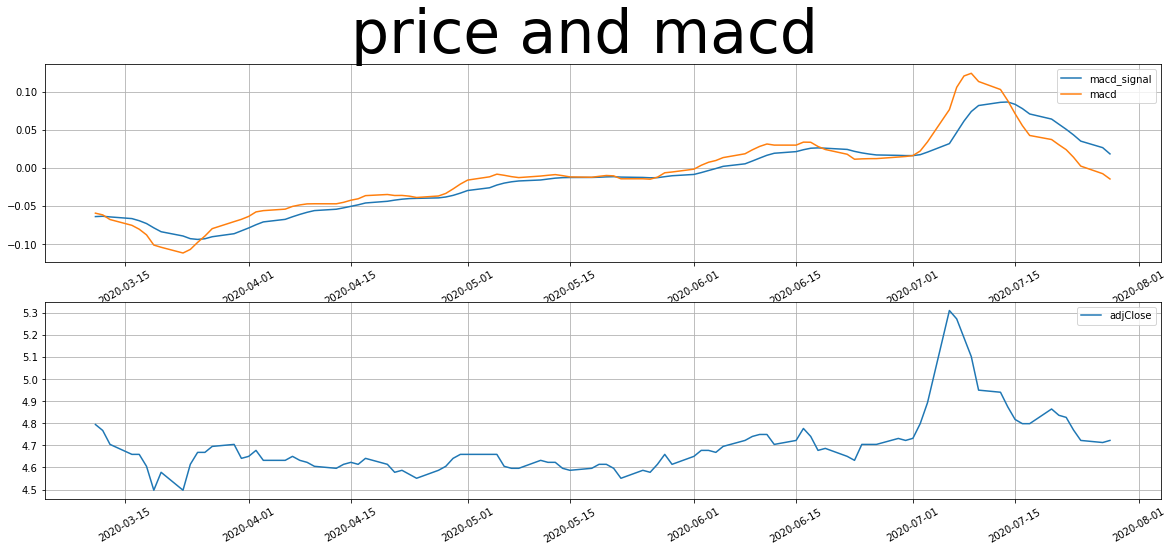

In [22]:
fig = plt.figure(figsize=(24, 20))
fig.suptitle('price and macd', fontsize=60)
axs = fig.subplots(2)

df2 = df.iloc[50:150]
df2['macd_signal'].plot(ax=axs[0], figsize=(20,8), rot=30, grid=True);
df2['macd'].plot(ax=axs[0], figsize=(20,8), rot=30, grid=True);
axs[0].legend()
df2['adjClose'].plot(ax = axs[1], figsize=(20,8), rot=30, grid=True);

plt.legend()